In [1]:
#First, let's open one of the data files

import pickle
with open('data/dataset_2011.pkl', 'rb') as infile:
  data_2011 = pickle.load(infile)

In [2]:
#We can look at all the types of information stored in this data

list(data_2011)

['B decay vertex x position',
 'B decay vertex y position',
 'B decay vertex z position',
 'B decay vertex fit chi2',
 'B impact parameter wrt primary vertex',
 'B impact parameter chi2 wrt primary vertex',
 'B flight distance wrt primary vertex',
 'B flight distance chi2 wrt primary vertex',
 'B cos(angle) between line-of-flight and momentum',
 'B magnitude of momentum',
 'B magnitude of momentum transverse to beam',
 'B 4-momentum energy component',
 'B 4-momentum x component',
 'B 4-momentum y component',
 'B 4-momentum z component',
 'B invariant mass',
 'B assumed particle type',
 'B lifetime',
 'Isolation: Charged cone angle',
 'Isolation: Charged cone number of particles contained',
 'Isolation: Charged cone eta difference between cone momentum and B',
 'Isolation: Charged cone phi difference between cone momentum and B',
 'Isolation: Charged cone ratio of B momentum and B+cone momentum all in transverse plane',
 'Isolation: Charged cone 4-momentum of max-PT object energy compon

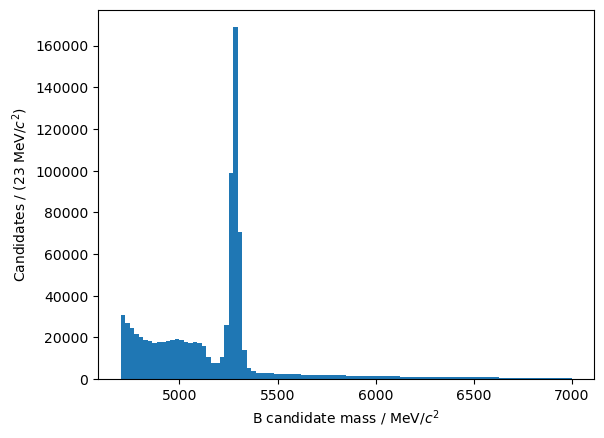

In [3]:
#Let's plot the distribution of masses of the candidate decays

from matplotlib import pyplot as plt 
plt.hist(data_2011['B invariant mass'], bins=100)
plt.xlabel(r'B candidate mass / MeV/$c^2$')
plt.ylabel(r'Candidates / (23 MeV/$c^2)$')
plt.show()

In [4]:
#The raw distibution has a clear peak around the mass of 5280 MeV. These are real B mesons

#There is a structure below 5150, this is mostly from decays of real B mesons to
#> 4 particles, and we have formed a 3-particle decay candidate from a subset. The missed particles
#take away some momentum, hence a lower mass is computed for the 3-particle combination.

#A very wide distribution sits under these two regions and extends all the way up to 7000 MeVc.
#This is from combinations of particles that are not the decay products of a single B meson

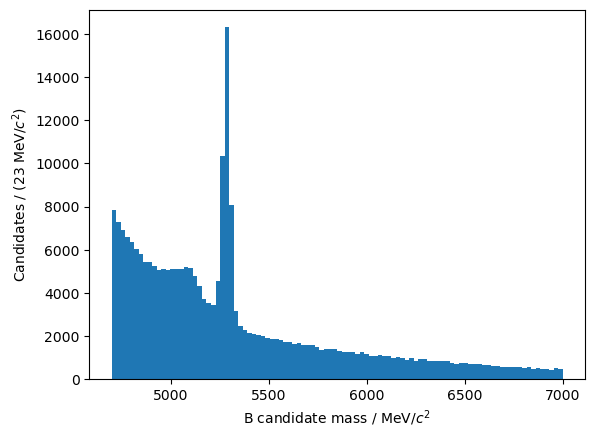

In [5]:
#Most of the real B mesons are actually B -> J/psi K decays. The J/psi is a charm-anticharm meson which decays to our two muons, and
#so, the dimuon system will have a mass consistent with the J/psi meson, 3097 MeV. If we remove these we get

plt.hist(data_2011[abs(data_2011['dimuon-system invariant mass'] - 3097) > 100]['B invariant mass'], bins=100)
plt.xlabel(r'B candidate mass / MeV/$c^2$')
plt.ylabel(r'Candidates / (23 MeV/$c^2)$')
plt.show()

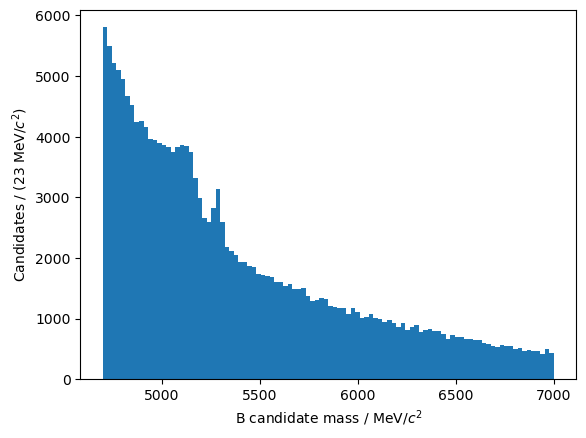

In [6]:
#Now most of what's remaining are actually B -> psi(2S) K decays. The psi(2S) is an excited state of the J/psi.
#It can also decay to our two muons, but now the dimuon system will have a mass consistent with the psi(2S) meson, 3686 MeV.
#If we also remove these, we'll see how much work we've got to do

plt.hist(data_2011[(abs(data_2011['dimuon-system invariant mass'] - 3097) > 100) & (abs(data_2011['dimuon-system invariant mass'] - 3686) > 100)]['B invariant mass'], bins=100)
plt.xlabel(r'B candidate mass / MeV/$c^2$')
plt.ylabel(r'Candidates / (23 MeV/$c^2)$')
plt.show()